In [56]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [57]:
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO)

In [58]:
from src.parameters import ANIMALS

#epoch_key = ('jaq', 1, 2)
epoch_key = ('chimi', 5, 2) # animal, day, epoch

In [75]:
from loren_frank_data_processing import make_tetrode_dataframe

tetrode_info = (make_tetrode_dataframe(ANIMALS)
                .xs(epoch_key, drop_level=False))

#tetrode_info = tetrode_info.loc[tetrode_info.area == 'hpc'] #i prob need to change to hpc rather than ca1
tetrode_info

area  clockrate         deadchans depth  \
animal day epoch tetrode_number                                                
chimi  5   2     1                    hpc      20000               NaN    []   
                 2                    hpc      20000               NaN    []   
                 3                    hpc      20000               NaN    []   
                 4                    hpc      20000               NaN    []   
                 5                leftref      20000                 2    []   
                 6                    hpc      20000               NaN    []   
                 7                    hpc      20000               NaN    []   
                 8                    hpc      20000               NaN    []   
                 9                    hpc      20000               NaN    []   
                 10                   hpc      20000               NaN    []   
                 11                   hpc      20000               NaN    []   
                 12                   hpc      20000               NaN    []   
                 13                   hpc      20000               NaN    []   
                 14                   hpc      20000               NaN    []   
                 15                   hpc      20000               NaN    []   
                 16                   hpc      20000               NaN    []   
                 17                   hpc      20000               NaN    []   
                 18                   hpc      20000               NaN    []   
                 19                   hpc      20000               NaN    []   
                 20                   hpc      20000               NaN    []   
                 21              rightref      20000                 3    []   
                 22                   hpc      20000               NaN    []   
                 23                   hpc      20000               NaN    []   
                 24                   hpc      20000               NaN    []   
                 25                  dead      20000               NaN    []   
                 26                  dead      20000               NaN    []   
                 27                  dead      20000               NaN    []   
                 28                  dead      20000               NaN    []   
                 29                  dead      20000               NaN    []   
                 30                  dead      20000               NaN    []   
                 31                  dead      20000               NaN    []   
                 32                  dead      20000               NaN    []   
                 33                   pfc      20000    [3, 7, 19, 23]    []   
                 34                   pfc      20000        [3, 7, 19]    []   
                 35                   pfc      20000  [11, 15, 27, 31]    []   
                 36                   pfc      20000      [15, 27, 31]    []   

                                    endtime  nTrode  nTrodeChannel  numcells  \
animal day epoch tetrode_number                                                
chimi  5   2     1               3671.69455       1              4         0   
                 2               3671.69455       2              4         0   
                 3               3671.69455       3              4         0   
                 4               3671.69455       4              4         0   
                 5               3671.69455       5              4         0   
                 6               3671.69455       6              4         0   
                 7               3671.69455       7              4         0   
                 8               3671.69455       8              4         0   
                 9               3671.69455       9              4         0   
                 10              3671.69455      10              4         0   
                 11              367

In [60]:
from loren_frank_data_processing import get_all_multiunit_indicators

tetrode_info = tetrode_info.loc[tetrode_info.area == 'hpc'] #i prob need to change to hpc rather than ca1

tetrode_keys = tetrode_info.index
multiunits = get_all_multiunit_indicators(tetrode_keys, ANIMALS)
multiunits

<xarray.DataArray (time: 2070039, features: 4, tetrodes: 22)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, 81., ..., nan, nan, nan],
        [nan, nan, 42., ..., nan, nan, nan],
        [nan, nan, 14., ..., nan, nan, nan],
        [nan, nan, 18., ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time      (time) timedelta64[ns] 00:38:11.669150 ... 01:01:11.694483
  * features  (features) <U13 'channel_1_max' ... 'channel_4_max'
Dimensions without coordinates: tetrodes

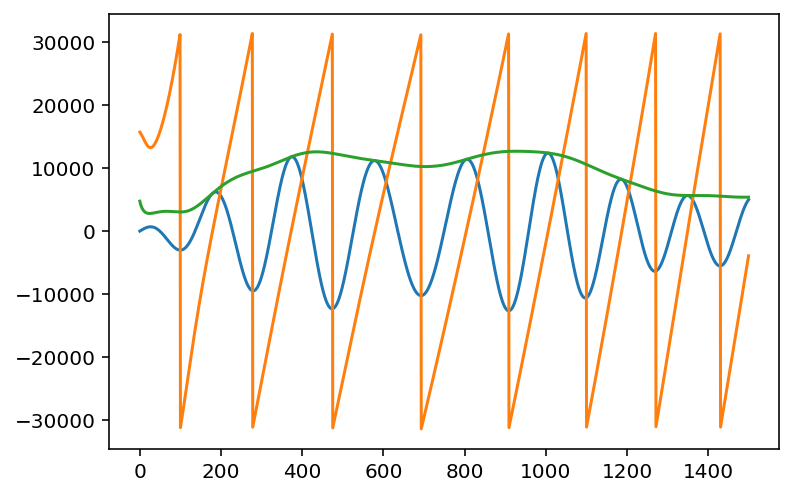

In [61]:
from src.load_data import get_filter_filename
from scipy.io import loadmat
import pandas as pd

tetrode_key = ('chimi', 5, 2, 1)
animals = ANIMALS
freq_band='theta'

filter_file = loadmat(
    get_filter_filename(tetrode_key, animals, freq_band))
filter_data = filter_file[freq_band][0, -1][0, -1][0, -1][0]
COLUMNS = ['bandpassed_lfp', 'instantaneous_phase', 'envelope_magnitude']
df = pd.DataFrame(filter_data['data'][0], columns=COLUMNS)

df.iloc[:1500, 0].plot()
df.iloc[:1500, 1].plot()
df.iloc[:1500, 2].plot()

In [76]:
from loren_frank_data_processing.core import reconstruct_time

time = reconstruct_time(
    filter_data['starttime'][0][0][0],
    filter_data['data'][0].shape[0],
    float(filter_data['samprate'][0][0][0]))

time

TimedeltaIndex(['00:38:11.669150', '00:38:11.669816', '00:38:11.670483',
                '00:38:11.671150', '00:38:11.671816', '00:38:11.672483',
                '00:38:11.673150', '00:38:11.673816', '00:38:11.674483',
                '00:38:11.675150',
                ...
                '01:01:11.688483', '01:01:11.689149', '01:01:11.689816',
                '01:01:11.690483', '01:01:11.691149', '01:01:11.691816',
                '01:01:11.692483', '01:01:11.693149', '01:01:11.693816',
                '01:01:11.694483'],
               dtype='timedelta64[ns]', name='time', length=2070039, freq=None)

In [77]:
from src.load_data import get_filter

get_filter(tetrode_key, ANIMALS)

,bandpassed_lfp,instantaneous_phase,envelope_magnitude
time,,,
00:38:11.669150,0,15708,4749
00:38:11.669816,39,15620,4470
00:38:11.670483,78,15522,4212
00:38:11.671150,117,15416,4025
00:38:11.671816,156,15302,3843
...,...,...,...
01:01:11.691816,1361,13589,6473
01:01:11.692483,1022,14069,6262
01:01:11.693149,681,14568,5989


In [78]:
tetrode_info = (make_tetrode_dataframe(ANIMALS)
                .xs(epoch_key, drop_level=False))
#tetrode_info.loc[tetrode_info.area == 'ref'].index[0]
#tetrode_info.loc[tetrode_info.area == 'cc'].index[0]
#print('first reference, updated meth: \n', tetrode_info.loc[tetrode_info.area.str.contains('ref')].index) #index[0]
print('unique references, updated meth: \n', tetrode_info.loc[tetrode_info.area.str.contains('ref')].ref.dropna().unique())
#print('unique references, old meth: \n', tetrode_info.ref.dropna().unique())
tetrode_info

unique references, updated meth: 
 [ 5. 21.]


area  clockrate         deadchans depth  \
animal day epoch tetrode_number                                                
chimi  5   2     1                    hpc      20000               NaN    []   
                 2                    hpc      20000               NaN    []   
                 3                    hpc      20000               NaN    []   
                 4                    hpc      20000               NaN    []   
                 5                leftref      20000                 2    []   
                 6                    hpc      20000               NaN    []   
                 7                    hpc      20000               NaN    []   
                 8                    hpc      20000               NaN    []   
                 9                    hpc      20000               NaN    []   
                 10                   hpc      20000               NaN    []   
                 11                   hpc      20000               NaN    []   
                 12                   hpc      20000               NaN    []   
                 13                   hpc      20000               NaN    []   
                 14                   hpc      20000               NaN    []   
                 15                   hpc      20000               NaN    []   
                 16                   hpc      20000               NaN    []   
                 17                   hpc      20000               NaN    []   
                 18                   hpc      20000               NaN    []   
                 19                   hpc      20000               NaN    []   
                 20                   hpc      20000               NaN    []   
                 21              rightref      20000                 3    []   
                 22                   hpc      20000               NaN    []   
                 23                   hpc      20000               NaN    []   
                 24                   hpc      20000               NaN    []   
                 25                  dead      20000               NaN    []   
                 26                  dead      20000               NaN    []   
                 27                  dead      20000               NaN    []   
                 28                  dead      20000               NaN    []   
                 29                  dead      20000               NaN    []   
                 30                  dead      20000               NaN    []   
                 31                  dead      20000               NaN    []   
                 32                  dead      20000               NaN    []   
                 33                   pfc      20000    [3, 7, 19, 23]    []   
                 34                   pfc      20000        [3, 7, 19]    []   
                 35                   pfc      20000  [11, 15, 27, 31]    []   
                 36                   pfc      20000      [15, 27, 31]    []   

                                    endtime  nTrode  nTrodeChannel  numcells  \
animal day epoch tetrode_number                                                
chimi  5   2     1               3671.69455       1              4         0   
                 2               3671.69455       2              4         0   
                 3               3671.69455       3              4         0   
                 4               3671.69455       4              4         0   
                 5               3671.69455       5              4         0   
                 6               3671.69455       6              4         0   
                 7               3671.69455       7              4         0   
                 8               3671.69455       8              4         0   
                 9               3671.69455       9              4         0   
                 10              3671.69455      10              4         0   
                 11              367

In [81]:
#tetrode_info.reset_index().tetrode_number == tetrode_info.ref.dropna().unique()
#tetrode_info.reset_index().tetrode_number == tetrode_info.loc[tetrode_info.area.str.contains('ref')].ref.dropna().unique()

tetrode_info.reset_index().tetrode_number 

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
Name: tetrode_number, dtype: int64

In [79]:
tetrode_info.loc[tetrode_info.area.str.contains('ref')].ref.dropna().unique()

array([ 5., 21.])

In [66]:
# is_ref = (tetrode_info.reset_index()
#           .tetrode_number.isin(tetrode_info.ref.dropna().unique())).values

In [82]:
is_ref = (tetrode_info.reset_index()
           .tetrode_number.isin(tetrode_info.loc[tetrode_info.area.str.contains('ref')].ref.dropna().unique())).values

In [83]:
is_ref

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [84]:
ref_tetrode_key = tetrode_info.loc[is_ref].index[0]

In [85]:
ref_tetrode_key

('chimi', 5, 2, 5)

In [88]:
theta_df = get_filter(ref_tetrode_key, ANIMALS, freq_band='theta')

In [89]:
theta_df
#this is getting the wrong theta! need to get the eeggnd theta i think

,bandpassed_lfp,instantaneous_phase,envelope_magnitude
time,,,
00:38:11.669150,0,-15707,810
00:38:11.669816,39,-15299,941
00:38:11.670483,77,-14960,1030
00:38:11.671150,116,-14665,1111
00:38:11.671816,155,-14394,1180
...,...,...,...
01:01:11.691816,366,-7709,510
01:01:11.692483,283,-9564,492
01:01:11.693149,201,-11607,503


In [ ]:
from src.load_data import get_interpolated_position_info

position_info = get_interpolated_position_info(epoch_key, ANIMALS)

In [ ]:
position_info

In [52]:
is_ref = (tetrode_info.reset_index()
              .tetrode_number.isin(tetrode_info.ref.dropna().unique())).values
    ref_tetrode_key = tetrode_info.loc[is_ref].index[0]
    theta_df = get_filter(ref_tetrode_key, ANIMALS, freq_band='theta')

IndentationError: unexpected indent (<ipython-input-52-76cef74c695f>, line 3)

In [ ]:
theta_df

In [ ]:
ref_tetrode_key

In [90]:
from src.load_data import get_filter

tetrode_key = ('chimi', 5, 2, 5)
theta_df = get_filter(tetrode_key, ANIMALS, freq_band='theta')

In [91]:
theta_df.sample(20)

,bandpassed_lfp,instantaneous_phase,envelope_magnitude
time,,,
00:41:37.701149,-1965,-28372,2059
00:53:03.277149,1579,14005,9313
00:49:53.017816,-9500,21305,17892
00:42:25.019816,-300,-19223,870
00:52:54.840483,-1678,20617,3559
00:52:26.886483,6331,3257,6682
00:42:08.537816,-21083,-30179,21245
00:45:08.519816,6347,-2466,6544
00:44:41.112483,-19968,29904,20199
